In [150]:
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata

In [151]:
#api info at https://dev.socrata.com/foundry/data.cdc.gov/9mfq-cb36
#table info https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36

client = Socrata("data.cdc.gov",None)

In [152]:
results = client.get("9mfq-cb36", limit=100000)

In [153]:
covid_df = pd.DataFrame(results)

In [154]:
#Set date and cutoff the date at january 1st 2022
covid_df= covid_df.sort_values(by=["submission_date"])
cutoff_date = pd.to_datetime('2022-01-01')
covid_df = covid_df[covid_df["submission_date"] <= cutoff_date]

In [155]:
#Update columns to intigers and correct date
covid_df["submission_date"]=pd.to_datetime(covid_df["submission_date"])
covid_df["tot_cases"]= covid_df['tot_cases'].apply(lambda x:int(float(x)))
covid_df["conf_cases"].fillna(0, inplace=True)
covid_df["conf_cases"]= covid_df['conf_cases'].apply(lambda x:int(float(x)))
covid_df["prob_cases"].fillna(0, inplace=True)
covid_df["prob_cases"]= covid_df['prob_cases'].apply(lambda x:int(float(x)))
covid_df["new_case"]= covid_df['new_case'].apply(lambda x:int(float(x)))
covid_df["pnew_case"].fillna(0, inplace=True)
covid_df["pnew_case"]= covid_df['pnew_case'].apply(lambda x:int(float(x)))
covid_df["new_death"]= covid_df['new_death'].apply(lambda x:int(float(x)))
covid_df["tot_death"]= covid_df["tot_death"].apply(lambda x:int(float(x)))
covid_df["pnew_death"].fillna(0, inplace=True)
covid_df["pnew_death"]= covid_df['pnew_case'].apply(lambda x:int(float(x)))

cutoff_date = pd.to_datetime('2022-01-01')
covid_df = covid_df[covid_df["submission_date"] <= cutoff_date]


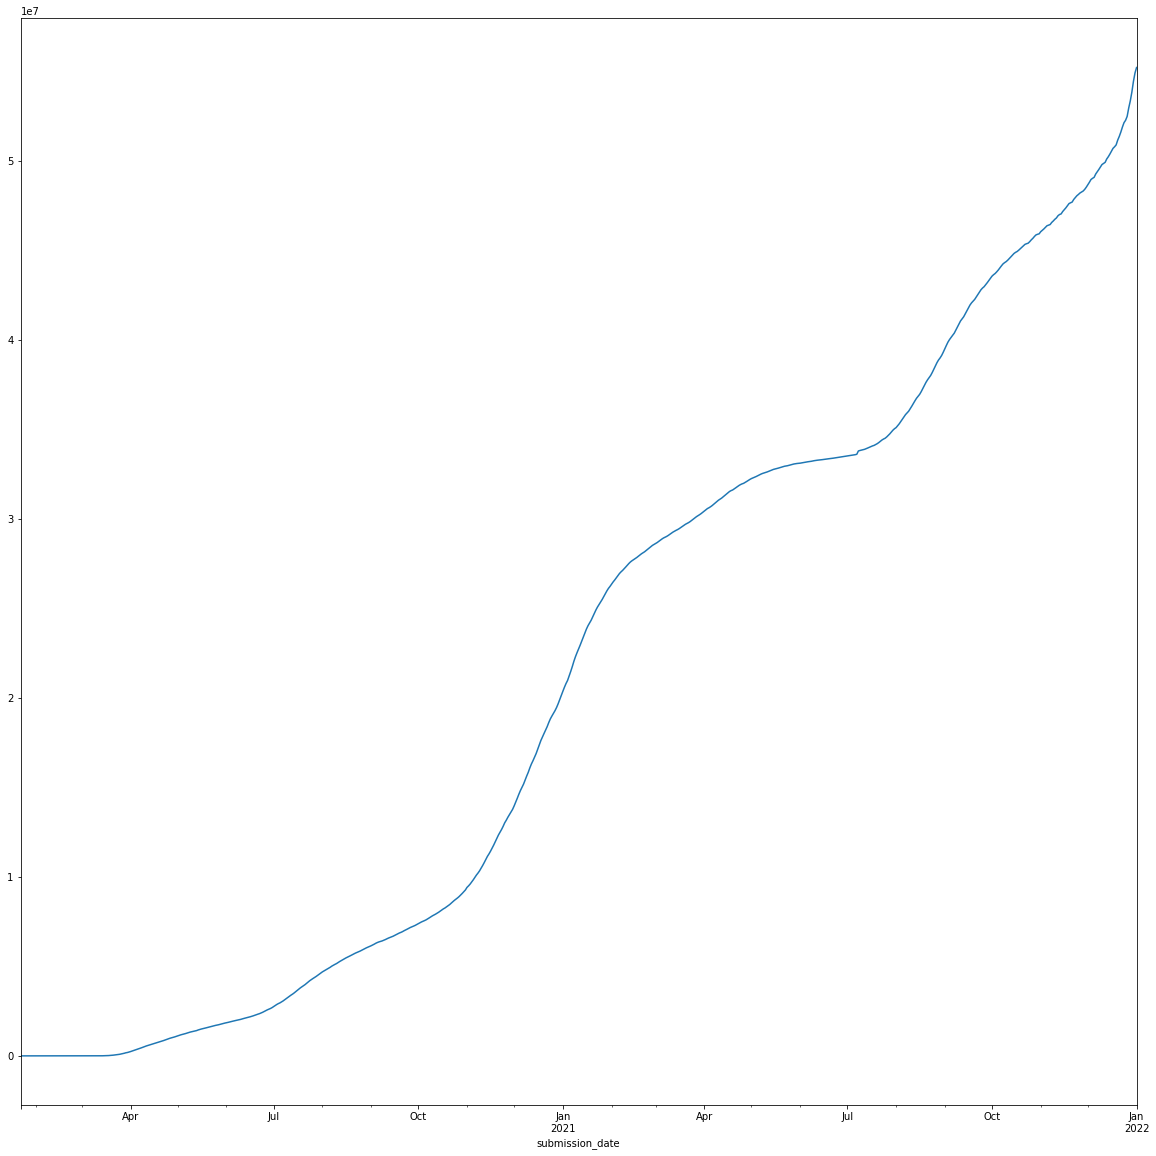

In [156]:
states= covid_df.groupby("submission_date").sum()["tot_cases"]

states.plot(kind="line", x="submission_date", y="tot_cases", figsize=(20,20) )
